# Business understanding
Our goal is to make a decision tree model to predict if a customer will accept a campaign, but most importantly to see what features are most important in deciding if person accepts a campaign or not.
- What are the most important factors in predicting campaign acceptance?
- Are there any patterns in customer spending habits that indicate a higher likelihood of campaign acceptance?
- How do demographic factors such as age, income, and education level influence campaign acceptance?



# Data Understanding


### People
**Basic information about the customer.**
- Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise


### Products
**Information about the amount spent on product groups by a customer.**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


### Promotion
**Information about the customer's promotion participation.**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


### Place
**Information about the location of the customer's activity.**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month


# Data Preparation


We will start by loading the data.

In [443]:
import pandas  as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('data/marketing_campaign.csv', sep='\t')
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [444]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We found that income column has 24 missing values. We will remove these rows since income could be an important factor in predicting campaign acceptance.

In [445]:
df = df.dropna(subset=["Income"])

In [446]:
print(df["Z_CostContact"].value_counts())
print(df["Z_Revenue"].value_counts())

Z_CostContact
3    2216
Name: count, dtype: int64
Z_Revenue
11    2216
Name: count, dtype: int64


`Z_CostContact` and `Z_Revenue` columns have only one unique value. We will remove these columns since they do not provide any useful information. 
also we will remove `ID`  `Dt_Customer` and `Recency` columns since they do not provide any useful information for us.

In [447]:
df.drop(columns = ['ID',"Z_CostContact","Z_Revenue","Response","Dt_Customer","Recency"] , axis=1, inplace=True)

In [448]:
df.nunique()

Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
dtype: int64

In [449]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Removing rows in `Marital_Status` column that have values "Absurd" and "YOLO" since they seem like "meme" values. 

In [450]:
df = df[~df["Marital_Status"].isin(["Absurd", "YOLO"])]

In [451]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,1968.811031,52232.510850,0.442586,0.505425,305.030741,26.324593,166.970163,37.516275,27.047468,43.822333,...,4.083183,2.668174,5.800181,5.320072,0.073689,0.074141,0.072785,0.063743,0.013562,0.009494
std,11.982065,25187.455359,0.537052,0.544258,337.611255,39.781794,224.344950,54.558673,41.092454,51.623472,...,2.741930,2.924378,3.253616,2.423445,0.261323,0.262060,0.259842,0.244350,0.115691,0.096994
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35233.500000,0.000000,0.000000,23.750000,1.750000,16.000000,3.000000,1.000000,9.000000,...,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,173.500000,8.000000,68.000000,12.000000,8.000000,24.000000,...,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,505.500000,33.000000,232.250000,50.000000,33.000000,56.000000,...,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



We will remove outliers from the `Income` column using the IQR method.

In [452]:
Q1 = df.Income.quantile(0.25)
Q3 = df.Income.quantile(0.75)
IQR = Q3 - Q1

Income_outliers = df[df.Income > Q3 + 1.5*IQR]
df = df[df.Income < Q3 + 1.5*IQR]
Income_outliers.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
164,1973,PhD,Married,157243.0,0,1,20,2,1582,1,...,0,22,0,0,0,0,0,0,0,0
617,1976,PhD,Together,162397.0,1,1,85,1,16,2,...,0,0,1,1,0,0,0,0,0,0
655,1975,Graduation,Divorced,153924.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
687,1982,PhD,Married,160803.0,0,0,55,16,1622,17,...,0,28,1,0,0,0,0,0,0,0
1300,1971,Master,Together,157733.0,1,0,39,1,9,2,...,1,0,1,1,0,0,0,0,0,0
1653,1977,Graduation,Together,157146.0,0,0,1,0,1725,2,...,0,28,0,1,0,0,0,0,0,0
2132,1949,PhD,Married,156924.0,0,0,2,1,2,1,...,0,0,0,0,0,0,0,0,0,0
2233,1977,Graduation,Together,666666.0,1,0,9,14,18,8,...,3,1,3,6,0,0,0,0,0,0


## **Feature Engineeringn**


### **Combining Features**
- **`TotalSpent`**: Sum of all product purchase amounts (`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`).
- **`AcceptedCmpAny`**:  Sum of all `AcceptedCmp` columns, then convert to a **binary indicator** (1 if the customer accepted any campaign).
- **`Age`**:  Recalculate customer **age relative to the dataset's creation year (2015)**.
- **`HasChildren`**:  Binary indicator of whether the customer has any children (`Kidhome` or `Teenhome` > 0).


In [453]:
df["AcceptedCmpAny"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"]
df["AcceptedCmpAny"] = df["AcceptedCmpAny"].apply(lambda x: 1 if x > 0 else 0)
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df["Age"] = 2015 - df["Year_Birth"]
df["HasChildren"] = (df["Kidhome"] + df["Teenhome"] > 0).astype(int)
df = df.drop(columns=["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","Year_Birth","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Kidhome","Teenhome"], axis=1)
df.describe()

,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmpAny,TotalSpent,Age,HasChildren
count,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000
mean,51617.730490,2.314428,4.096189,2.642015,5.818512,5.335299,0.009528,0.207804,606.510436,46.202359,0.715517
std,20721.492888,1.885162,2.737710,2.795703,3.244703,2.411880,0.097168,0.405828,602.352523,11.988415,0.451270
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,19.000000,0.000000
25%,35191.500000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,69.000000,38.000000,0.000000
50%,51301.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,396.000000,45.000000,1.000000
75%,68289.750000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,1045.500000,56.000000,1.000000
max,113734.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,2525.000000,122.000000,1.000000


### **Categorizing**
To reduce noise and make decision trees more interpretable: 

- **`IncomeCategory`**: Categorical column based on **income quantiles**.
- **`SpendingHabits`**: Categorical column based on **total spending quantiles**.
- **`AgeGroup`**: Categorical column of ages grouped into **18-35, 36-55, 56+**.
- **`WebEngagement`**: Categorical column based on **number of web visits per month**.

In [454]:
num_groups = 3
df["IncomeCategory"] = pd.qcut(df["Income"], q=num_groups, labels=["Low Income", "Medium Income", "High Income"])
df["SpendingHabits"] = pd.qcut(df["TotalSpent"], q=3, labels=["Low Spender","Medium Spender", "High Spender"])
df["WebEngagement"] = pd.cut(df["NumWebVisitsMonth"], bins=[0, 2, 5, 20], labels=["Low", "Medium", "High"])
bins = [17, 35,55, 100]
labels = ["18-35", "36-55", "56+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)


### **Binary Features** 
  making some binary features based on the existing data, may help us to find some patterns.

- **`Has_Partner`**: 1 if the customer is **married or living with a partner**.
- **`IsAlone`**: 1 if the customer is **not married, has no kids, and no teenagers**.
- **`SingleParent`**:
- **`HigherEducation`**: 1 if the customer has a **Master’s or PhD**.
- **`above_average_storepurchase`**: .
- **`above_average_webpurchase`**: 
- **`above_average_webvisits`**: 
- **`above_average_catalog`**: 

In [455]:

df["Has_Partner"] = df["Marital_Status"].apply(lambda x: 1 if x in ["Together", "Married"] else 0)
df["IsAlone"] = ((df["Has_Partner"] == 0) & (df["HasChildren"] == 0)).astype(int)
df["SingleParent"] = ((df["Has_Partner"] == 0) & (df["HasChildren"] > 0)).astype(int)

df["HigherEducation"] = df["Education"].apply(lambda x: 1 if x in ["Master", "PhD"] else 0)

df["above_average_storepurchase"] = (df["NumStorePurchases"] > df["NumStorePurchases"].mean()).astype(int)
df["above_average_webpurchase"] = (df["NumWebPurchases"] > df["NumWebPurchases"].mean()).astype(int)
df["above_average_webvisits"] = (df["NumWebVisitsMonth"] > df["NumWebVisitsMonth"].mean()).astype(int)
df["above_average_catalog"] = (df["NumCatalogPurchases"] > df["NumCatalogPurchases"].mean()).astype(int)

In [456]:
df.describe()

,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmpAny,TotalSpent,Age,HasChildren,Has_Partner,IsAlone,SingleParent,HigherEducation,above_average_storepurchase,above_average_webpurchase,above_average_webvisits,above_average_catalog
count,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000
mean,51617.730490,2.314428,4.096189,2.642015,5.818512,5.335299,0.009528,0.207804,606.510436,46.202359,0.715517,0.645644,0.112976,0.241379,0.380218,0.434664,0.380672,0.523140,0.394283
std,20721.492888,1.885162,2.737710,2.795703,3.244703,2.411880,0.097168,0.405828,602.352523,11.988415,0.451270,0.478426,0.316636,0.428017,0.485550,0.495825,0.485662,0.499578,0.488807
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35191.500000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,69.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51301.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,396.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,68289.750000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,1045.500000,56.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,113734.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,2525.000000,122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



There was one dude who was 122 years old in the dataset so lets filter the ages to be between 18 and 90.

In [457]:
df = df[(df["Age"] >= 18) & (df["Age"] <= 90)]
df

,Education,Marital_Status,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmpAny,...,WebEngagement,AgeGroup,Has_Partner,IsAlone,SingleParent,HigherEducation,above_average_storepurchase,above_average_webpurchase,above_average_webvisits,above_average_catalog
0,Graduation,Single,58138.0,3,8,10,4,7,0,0,...,High,56+,0,1,0,0,0,1,1,1
1,Graduation,Single,46344.0,2,1,1,2,5,0,0,...,Medium,56+,0,0,1,0,0,0,0,0
2,Graduation,Together,71613.0,1,8,2,10,4,0,0,...,Medium,36-55,1,0,0,0,1,1,0,0
3,Graduation,Together,26646.0,2,2,0,4,6,0,0,...,High,18-35,1,0,0,0,0,0,1,0
4,PhD,Married,58293.0,5,5,3,6,5,0,0,...,Medium,18-35,1,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,2,9,3,4,5,0,0,...,Medium,36-55,1,0,0,0,0,1,0,1
2236,PhD,Together,64014.0,7,8,2,5,7,0,1,...,High,56+,1,0,0,1,0,1,1,0
2237,Graduation,Divorced,56981.0,1,2,3,13,6,0,1,...,High,18-35,0,1,0,0,1,0,1,1
2238,Master,Together,69245.0,2,6,5,10,3,0,0,...,Medium,56+,1,0,0,1,1,1,0,1


Total removed rows because of filtering:  **39**. after cleaning the data we have 2201 rows, we could drop some more columns buut they might be needed.

## Data Visualization
lets visualize the numerical data to make sure that we didnt miss anything in filtering. We will also check if there are some imbalances in the distribution of our binary features.

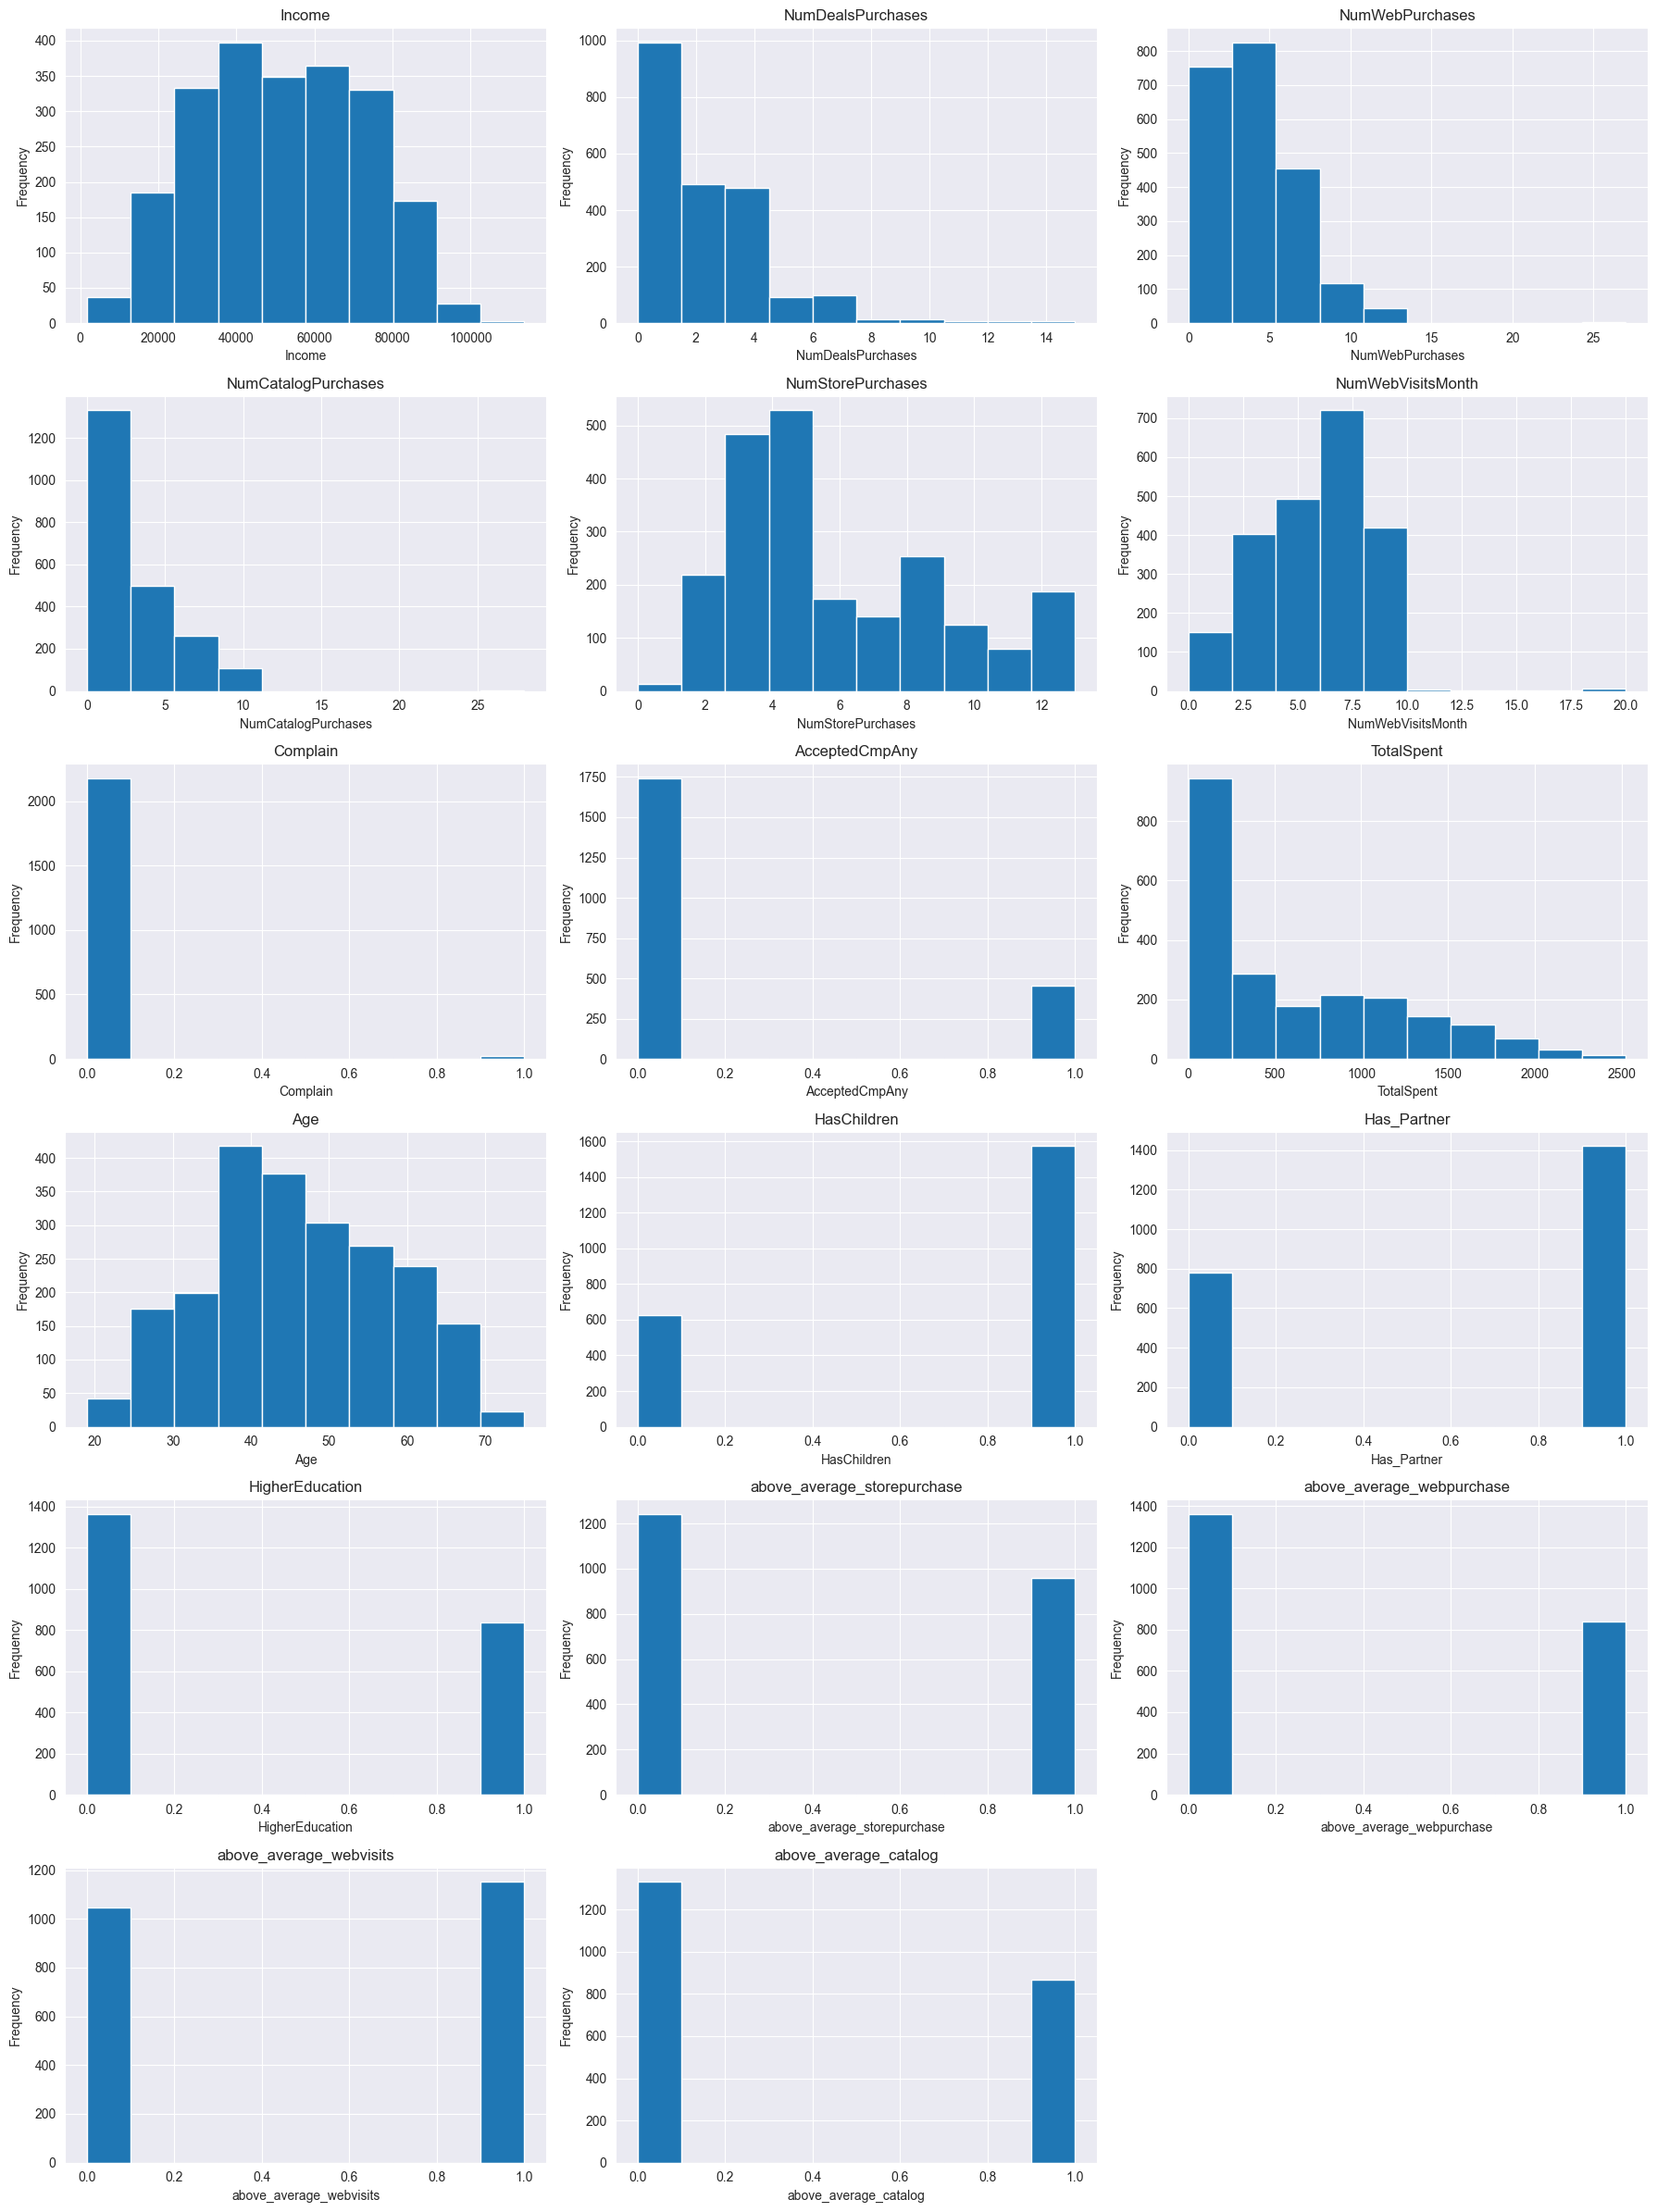

In [458]:
#select only numerical data
import math
visual = df.select_dtypes(include=['int64', 'float64']).drop(columns=["IsAlone","SingleParent"], axis=1)

import matplotlib.pyplot as plt

def plot_data(df):
    
    num_cols = len(df.columns)
    
    # Dynamically determine grid size (rows x cols)
    cols = min(3, num_cols)  # Max 3 columns per row
    rows = math.ceil(num_cols / cols)  # Calculate required rows
    
    plt.figure(figsize=(cols * 6, rows * 4))  # Adjust figure size dynamically
    
    for i, col in enumerate(df.columns):
        plt.subplot(rows, cols, i + 1)
        df[col].plot(kind='hist', title=col)
        plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

plot_data(visual)


There wasnt anything major that caught our eye in the histograms. The inbalance in  the target feature is expected since most people dont accept campaigns.

# Data Analysis

Les see data types before creating correlation matrix

In [459]:
df.dtypes

Education                        object
Marital_Status                   object
Income                          float64
NumDealsPurchases                 int64
NumWebPurchases                   int64
NumCatalogPurchases               int64
NumStorePurchases                 int64
NumWebVisitsMonth                 int64
Complain                          int64
AcceptedCmpAny                    int64
TotalSpent                        int64
Age                               int64
HasChildren                       int64
IncomeCategory                 category
SpendingHabits                 category
WebEngagement                  category
AgeGroup                       category
Has_Partner                       int64
IsAlone                           int64
SingleParent                      int64
HigherEducation                   int64
above_average_storepurchase       int64
above_average_webpurchase         int64
above_average_webvisits           int64
above_average_catalog             int64


#### Correlation
We are gonna use raw data  and ignore the binary columns for averages.(also categories will be ignored)
correlation will be done against the target feature `AcceptedCmpAny`

In [460]:
corr = df.drop(columns=["IncomeCategory","SpendingHabits","AcceptedCmpAny","Marital_Status","Education","AgeGroup","WebEngagement"], axis=1).corrwith(df["AcceptedCmpAny"])


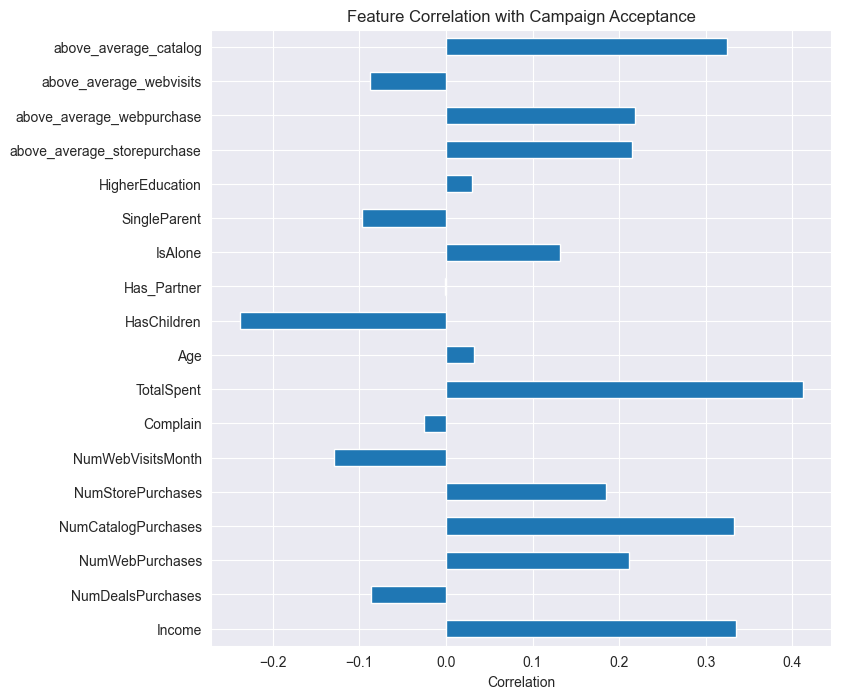

In [461]:

corr.plot(kind="barh", figsize=(8, 8), title="Feature Correlation with Campaign Acceptance")

plt.xlabel("Correlation")
plt.show()




We can see that `TotalSpent` has the highest correlation with the target feature. Additionally, all the features that indicate higher spending are strongly correlated with campaign acceptance, which is expected. Interestingly, it appears that people with children tend to be less likely to accept campaign, and people that live alone tend to accept them.
buut we cant be really sure if its causation or correlation.

In [462]:
df.skew(numeric_only=True).sort_values(ascending=False)

Complain                       10.353998
IsAlone                         2.444394
NumDealsPurchases               2.318564
AcceptedCmpAny                  1.442591
NumCatalogPurchases             1.369411
SingleParent                    1.213265
NumWebPurchases                 1.203497
TotalSpent                      0.861001
NumStorePurchases               0.707082
HigherEducation                 0.493556
above_average_webpurchase       0.489585
above_average_catalog           0.432588
above_average_storepurchase     0.261350
NumWebVisitsMonth               0.232274
Age                             0.091354
Income                          0.014273
above_average_webvisits        -0.095585
Has_Partner                    -0.611348
HasChildren                    -0.956390
dtype: float64

lets create a scatterplot and see if we can see some patterns and check if there are some patterns in incomes and total spending vs campaign acceptance.
blue dots are people who accepted the campaign.
red dots are people who didnt accept the campaign.

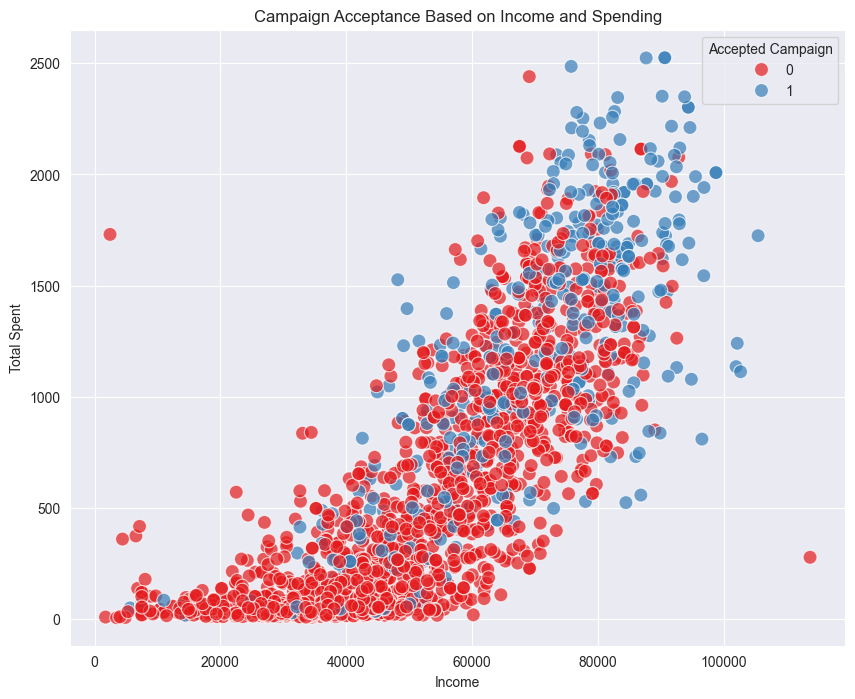

In [463]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df["Income"], 
    y=df["TotalSpent"], 
    hue=df["AcceptedCmpAny"], 
    palette="Set1", 
    s=100, 
    alpha=0.7
)

plt.xlabel("Income")
plt.ylabel("Total Spent")
plt.title("Campaign Acceptance Based on Income and Spending")
plt.legend(title="Accepted Campaign")
plt.show()


well we didnt learn much, seems  that people who spend more than 2000 are more likely to accept campaigns.

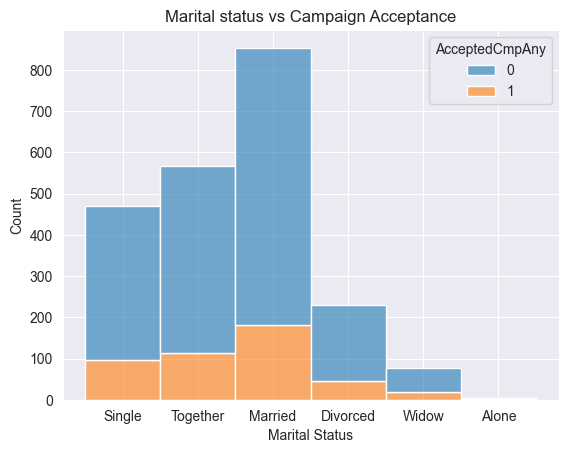

In [464]:
sns.histplot(data=df, x="Marital_Status", hue="AcceptedCmpAny", bins=30, alpha=0.6, multiple="stack")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Marital status vs Campaign Acceptance")
plt.show()

Marital status also doesnt seem to have any effect on campaign acceptance.

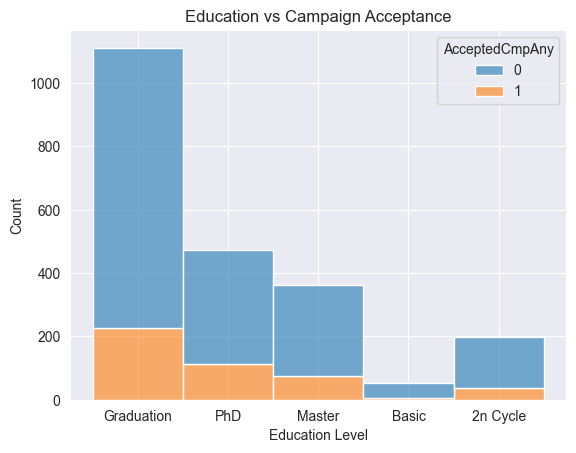

In [465]:
sns.histplot(data=df, x="Education", hue="AcceptedCmpAny", bins=30, alpha=0.6, multiple="stack")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Education vs Campaign Acceptance")
plt.show()

Education level doesnt seem to have any effect on campaign acceptance.

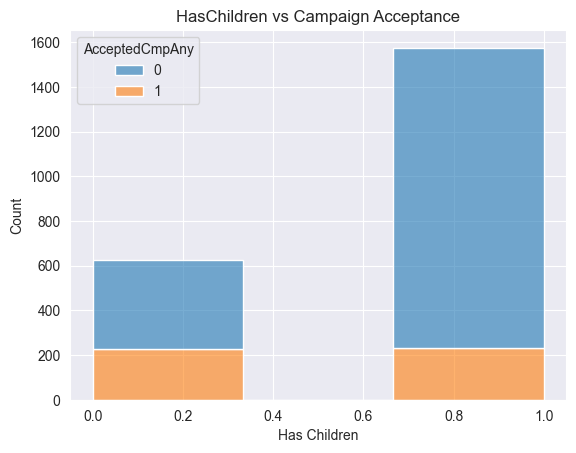

In [466]:
sns.histplot(data=df, x="HasChildren", hue="AcceptedCmpAny", bins=3, alpha=0.6, multiple="stack")
plt.xlabel("Has Children")
plt.ylabel("Count")
plt.title("HasChildren vs Campaign Acceptance")
plt.show()

~30% of people who doesnt have children accepted the campaign! thats something atleast.

#### Apriori Analysis
We will use apriori analysis to find any association rules between the features and campaign acceptance.

checking datatypes before apriori analysis to see what we need for one hot encoding.

In [467]:
df.dtypes

Education                        object
Marital_Status                   object
Income                          float64
NumDealsPurchases                 int64
NumWebPurchases                   int64
NumCatalogPurchases               int64
NumStorePurchases                 int64
NumWebVisitsMonth                 int64
Complain                          int64
AcceptedCmpAny                    int64
TotalSpent                        int64
Age                               int64
HasChildren                       int64
IncomeCategory                 category
SpendingHabits                 category
WebEngagement                  category
AgeGroup                       category
Has_Partner                       int64
IsAlone                           int64
SingleParent                      int64
HigherEducation                   int64
above_average_storepurchase       int64
above_average_webpurchase         int64
above_average_webvisits           int64
above_average_catalog             int64


creating new column for apriori analysis: `HasNoChildren` so we can see if people with no children are more likely to accept campaigns.
we are going to use features : `HigherEducation`, `IncomeCategory`, `AcceptedCmpAny`, `AgeGroup`, `HasChildren`, `HasNoChildren` in the analysis.

In [468]:
df["HasNoChildren"] = (df["HasChildren"] == 0).astype(int)
df_hot = df[["HigherEducation","IncomeCategory","AcceptedCmpAny","AgeGroup","HasChildren","HasNoChildren"]].copy()
df_hot = pd.get_dummies(df_hot,columns=["AgeGroup","IncomeCategory"])
df_hot


,HigherEducation,AcceptedCmpAny,HasChildren,HasNoChildren,AgeGroup_18-35,AgeGroup_36-55,AgeGroup_56+,IncomeCategory_Low Income,IncomeCategory_Medium Income,IncomeCategory_High Income
0,0,0,0,1,False,False,True,False,True,False
1,0,0,1,0,False,False,True,False,True,False
2,0,0,0,1,False,True,False,False,False,True
3,0,0,1,0,True,False,False,True,False,False
4,1,0,1,0,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
2235,0,0,1,0,False,True,False,False,True,False
2236,1,1,1,0,False,False,True,False,False,True
2237,0,1,0,1,True,False,False,False,True,False
2238,1,0,1,0,False,False,True,False,False,True


we are also filtering the output to only show only conseuqents that have `AcceptedCmpAny` in them.

In [469]:
from mlxtend.frequent_patterns import apriori, association_rules
freq = apriori(df_hot, min_support=0.05, use_colnames = True)
rules = association_rules(freq, metric='confidence', min_threshold=0.05)
rules.sort_values(by='support', ascending=False)

desired_cons = "AcceptedCmpAny" 
filtered_rules = rules[rules["consequents"].apply(lambda x: desired_cons in list(x))]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(HigherEducation),(AcceptedCmpAny),0.380282,0.207633,0.084961,0.223417,1.076019,1.0,0.006002,1.020325,0.114001,0.168925,0.019920,0.316304
19,(HasChildren),(AcceptedCmpAny),0.715584,0.207633,0.104952,0.146667,0.706375,1.0,-0.043626,0.928555,-0.593746,0.128262,-0.076942,0.326069
20,(HasNoChildren),(AcceptedCmpAny),0.284416,0.207633,0.102681,0.361022,1.738753,1.0,0.043626,1.240055,0.593746,0.263711,0.193584,0.427776
22,(AgeGroup_36-55),(AcceptedCmpAny),0.557474,0.207633,0.104952,0.188264,0.906716,1.0,-0.010798,0.976139,-0.188632,0.158981,-0.024444,0.346867
25,(AgeGroup_56+),(AcceptedCmpAny),0.253067,0.207633,0.059064,0.233393,1.124066,1.0,0.006519,1.033603,0.147768,0.147059,0.032511,0.258929
27,(IncomeCategory_Medium Income),(AcceptedCmpAny),0.333030,0.207633,0.053158,0.159618,0.768751,1.0,-0.015990,0.942865,-0.310826,0.109040,-0.060597,0.207818
29,(IncomeCategory_High Income),(AcceptedCmpAny),0.333485,0.207633,0.124943,0.374659,1.804432,1.0,0.055701,1.267097,0.668865,0.300218,0.210794,0.488205
127,"(AgeGroup_36-55, HasChildren)",(AcceptedCmpAny),0.446161,0.207633,0.064970,0.145621,0.701340,1.0,-0.027667,0.927419,-0.434674,0.110340,-0.078261,0.229266
129,(AgeGroup_36-55),"(AcceptedCmpAny, HasChildren)",0.557474,0.104952,0.064970,0.116544,1.110451,1.0,0.006462,1.013121,0.224767,0.108745,0.012951,0.367796
131,(HasChildren),"(AgeGroup_36-55, AcceptedCmpAny)",0.715584,0.104952,0.064970,0.090794,0.865094,1.0,-0.010132,0.984427,-0.354127,0.085989,-0.015819,0.354921


After checking the apriori analysis we can come  to these conclusions:
- **Best target group**: **High-income customers with no children (Lift = 2.1, Confidence = 45%)**.
- **Older customers (56+) show a moderate tendency to accept campaigns**.
- **Higher education has little effect, except for a small increase among PhD holders**.
- **Middle-income and middle-aged customers are less likely to accept campaigns**.
- **We confirmed that customers that does not have childrern will more likely to accept campaigns**.
HighIncome = more spending = more likely to accept campaigns
seems that our model is gonna be heavily influenced by spending habits and income prolly.





# Modeling
Based on our analysis, we will be using these features in the model:
- SpendingHabits
- above_average_webvisits
- HasNoChildren
- above_average_catalog 
 
Data will be split into training and testing sets with a 75/25 ratio. 
We will be using `class_weight="balanced"` to account for the class imbalance in the target feature.

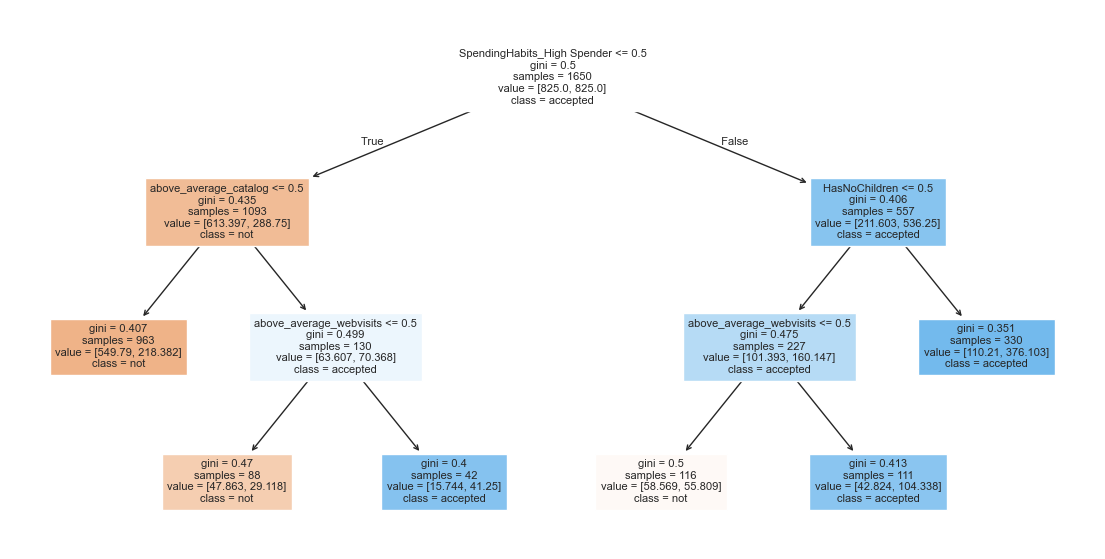

In [470]:

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


X = df[["SpendingHabits","above_average_webvisits","HasNoChildren","above_average_catalog"]].copy()
y = df["AcceptedCmpAny"]

X = pd.get_dummies(X,columns=["SpendingHabits"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)



model = DecisionTreeClassifier(random_state=20,max_depth=8,class_weight="balanced", ccp_alpha=0.0027).fit(X_train, y_train)
fig = plt.figure(figsize = (14, 7))
plot_tree(model, feature_names = X.keys(), class_names = ['not', 'accepted'],fontsize=8, filled = True)
plt.show()




# Evaluation

## Confusion Matrix

In [471]:
preds = model.predict(X_test)
confusion_matrix(y_test, preds)

array([[346,  88],
       [ 45,  72]])

Based on the confusion matrix our model is doing actually better than i imagined in predicting the campaign acceptance.
45 wrongly guessed campain acceptances is not that bad, since its mostly guessing based on spending habits.

lets plot the feature importances to see what features are most important in our model

## Feature Importances

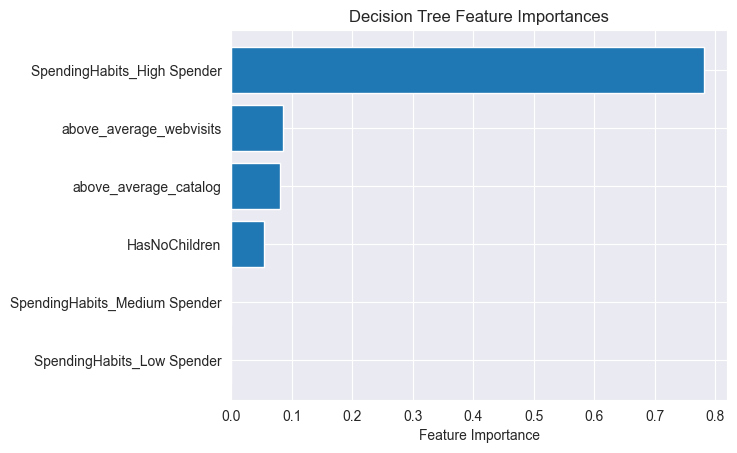

In [472]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = model.feature_importances_
features = X_train.columns

sorted_idx = np.argsort(feature_importances)
plt.barh(np.array(features)[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importances")
plt.show()

well nothing unexpected here, spending habits are the most important feature, and webvisits,catalog purchases and having no children plays a minor role

## Scores
We will be evaluating the model based on these scores:
- **Accuracy**:
- **Recall**: 
- **Precision**:
- **F1 Score**:


In [473]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

accuracy_test = accuracy_score(y_test, preds)
recall_test = recall_score(y_test, preds, average="binary")
precision_test = precision_score(y_test, preds, average="binary")
f1_test = f1_score(y_test, preds, average="binary")
print(f"Accuracy of Decision Tree classifier on the test set: {accuracy_test:.3f}")
print(f"Recall score of Decision Tree classifier on the test set: {recall_test:.3f}")
print(f"Precision score of Decision Tree classifier on the test set: {precision_test:.3f}")
print(f"F1 score of Decision Tree classifier on the test set: {f1_test:.3f}")


Accuracy of Decision Tree classifier on the test set: 0.759
Recall score of Decision Tree classifier on the test set: 0.615
Precision score of Decision Tree classifier on the test set: 0.450
F1 score of Decision Tree classifier on the test set: 0.520


the scores are nothing to write home about but they are decent since we didnt even expect any good results from the get go. it doesnt seem its totally guessing it only misses about 39/100 deals based on recall score. However, with a precision of 45%, it also incorrectly predicts around 55 out of 100 as accepted when they actually wouldn’t be. While not perfect, it's at least picking up on some patterns rather than making purely random predictions.

# Conclusion
This model is not intended for deployment in a real-world scenario, but it does provide some insights into the key factors influencing campaign acceptance. As expected, spending habits and income play the most significant role, suggesting that higher spenders are more likely to engage with campaigns. 
 
Interestingly, customers without children appear to be more receptive to campaign offers. While the model is far from perfect, it effectively captures patterns rather than making random predictions. 
 
So, did we find the answers to our questions? Well, it seems that spending habits are the strongest predictor (High Spenders), which suggests that those who accept campaigns are likely frequent customers who prefer using "IFood" for their shopping. 
 
We couldnt find any clear patterns since  the data was kinda scarce, but it seems  that catalog shoppers were more inclined to accept campaigns, which could indicate that they are more receptive to promotional offers. 
 
Demoographics seem to have a minor impact on campaign acceptance, with the singular exception children = less likely to accept campaigns. 

Based on these findings, I would strongly recommend targeting campaigns toward households without children—they might be the most receptive audience!



